# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dzakwan Ammar Aziz
- **Email:** dzakwancurup@gmail.com
- **ID Dicoding:** dzakwan_ammar_aziz

## Menentukan Pertanyaan Bisnis

- Pada musim apa permintaan untuk menyewa sepeda paling tinggi?
- Adakah pengaruh cuaca terhadap banyaknya orang menyewa sepeda
- Pada jam berapakah penyewaan sepeda tertinggi



## Import Semua Packages/Library yang Digunakan

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [76]:
#menampilkan table day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
#menampilkan table hour
hr_df = pd.read_csv("hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [78]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [79]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


######Terdapat kesalahan tipe data pada dteday yang bertipe data object yang mana harusnya bertipe data datetime

In [80]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [81]:
# mengecek keberadaan missing value di dataset hour_df
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Seperti yang bisa dilihat di atas tidak ada missing value di dataframe day_df dan hour_df

In [82]:
# memeriksa duplikasi
print("Jumlah duplikasi data: ", day_df.duplicated().sum())
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0
Jumlah duplikasi data:  0


In [83]:
#memeriksa rangkuman parameter statistik data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [84]:
#memeriksa rangkuman parameter statistik data hr_df
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data



*   Pada bagian cleaning saya akan memperbaiki tipe data pada dteday yang mana harusnya tipe datanya adalah date_time tapi di dataset tipe datanya object
*   Lalu saya juga akan mengganti nilai season, weekday, month, dan year dari angka menjadi keterangan agar bisa lebih mudah untuk dipahami



#### Membenarkan tipe data

In [85]:
#Kita akan membenarkan type data dteday yang dari object akan diubah menjadi date_time
# day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
# hr_df
hr_df["dteday"] = pd.to_datetime(hr_df["dteday"])

In [86]:
#cek kembali tipe datanya sudah berubah atau belum
print(day_df.info())
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### seperti yang bisa dilihat di atas tipe datanya sudah berubah dari yang semula bertipe object telah menjadi date_time

#### Mengubah nilai season, weekday, month, dan year

In [87]:
# mengganti nilai musim dengan nama musim yang sesuai
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hr_df['season'] = hr_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [88]:
#mengganti nilai weatherist dengan keterangan nama yang jelas
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Light Rain/Windy',
    3: 'Misty',
    4: 'Light Snow/Heavy Rain'
})

hr_df['weathersit'] = hr_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Light Rain/Windy',
    3: 'Misty',
    4: 'Light Snow/Heavy Rain'
})

In [89]:
# mengubah nilai weekday menjadi hari berdasarkan tanggal pada dteday
day_df['weekday'] = day_df['dteday'].dt.day_name()
hr_df['weekday'] = hr_df['dteday'].dt.day_name()

# mengubah nilai month sesuai dengan bulan pada dteday
day_df['mnth'] = day_df['dteday'].dt.month_name()
hr_df['mnth'] = hr_df['dteday'].dt.month_name()

# mengubah nilai yr sesuai dengan tahun pada dteday
day_df['yr'] = day_df['dteday'].dt.year
hr_df['yr'] = hr_df['dteday'].dt.year

In [90]:
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Light Rain/Windy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Light Rain/Windy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [91]:
hr_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32


##### Seperti yang bisa dilihat di atas nilai-nilai dari kolom season, weathersit, yr, mnth, dan weekday telah diganti agar dapat lebih mudah dimengerti.

## Exploratory Data Analysis (EDA)

In [92]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,NaN,Saturday,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa jumlah data entri sebanyak 731 dan jumlah rata-rata perentalan sepeda sebanyak 4504 per hari.

In [93]:
#melihat jumlah sewaan sepeda tiap musim
day_df.groupby(by='season')['cnt'].sum().sort_values(ascending=False).reset_index(name='total_rental')

,season,total_rental
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


##### Berdasarkan tabel di atas diketahui bahwa pada musim fall dan musim summer orang melakukan rentalan terbanyak

In [94]:
#melihat hubungan cuaca dengan jumlah penyewaan sepeda
day_df.groupby(by='weathersit')['cnt'].sum().reset_index(name='total_rental')

,weathersit,total_rental
0,Clear/Partly Cloudy,2257952
1,Light Rain/Windy,996858
2,Misty,37869


###### pada tabel di atas orang-orang banyak menyewa sepeda pada cuaca Clear/Partly Cloudy

In [95]:
# melihat rangkuman parameter statistik dari data hr_df
hr_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Saturday,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa jumlah data entri sebanyak 17379 dan jumlah rata-rata perentalan sepeda sebanyak 189 perjam. Dalam rentang waktu jam 00.00 sampai 23.59, rata-rata penyewaan pada jam 11.54 dengan standar deviasi sebesar 6.91.

In [96]:
jam_rata_rata = hr_df.groupby('hr')['cnt'].mean().idxmax()

print(f"Rata-rata jam ketika orang menyewa sepeda paling banyak adalah pada jam {jam_rata_rata}")

Rata-rata jam ketika orang menyewa sepeda paling banyak adalah pada jam 17


## Visualization & Explanatory Analysis

### **Pertanyaan 1: Pada musim apa permintaan untuk menyewa sepeda paling tinggi?**

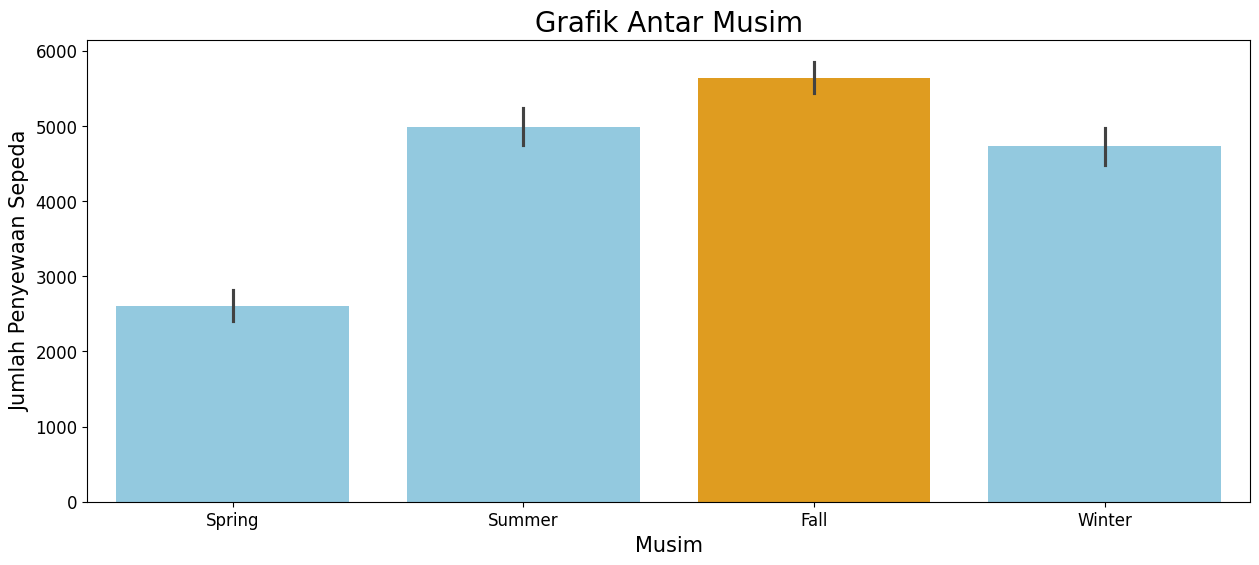

In [100]:
# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (15, 6)
fig, ax = plt.subplots(figsize=(15, 6))

# Membuat barplot untuk y="cnt" dan x="season", menggunakan data=day_df
sns.barplot(
    y="cnt",
    x="season",
    data=day_df,
    hue="season",
    palette={"Spring": "#87CEEB", "Summer": "#87CEEB", "Fall": "#FFA500", "Winter": "#87CEEB"},
    ax=ax,
    order=["Spring", "Summer", "Fall", "Winter"],
    legend=False
)

# Mengatur judul, label y dan x
ax.set_title("Grafik Antar Musim", loc="center", fontsize=20)
ax.set_ylabel("Jumlah Penyewaan Sepeda", fontsize=15)
ax.set_xlabel("Musim", fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Menampilkan plot
plt.show()

##### Seperti yang bisa dilihat dari grafik musim yang paling banyak terjadinya penyewaan adalah pada musim Gugur(Fall) dengan total ada 1061129 penyewaan


### **Pertanyaan 2: adakah pengaruh cuaca terhadap banyaknya orang menyewa sepeda**

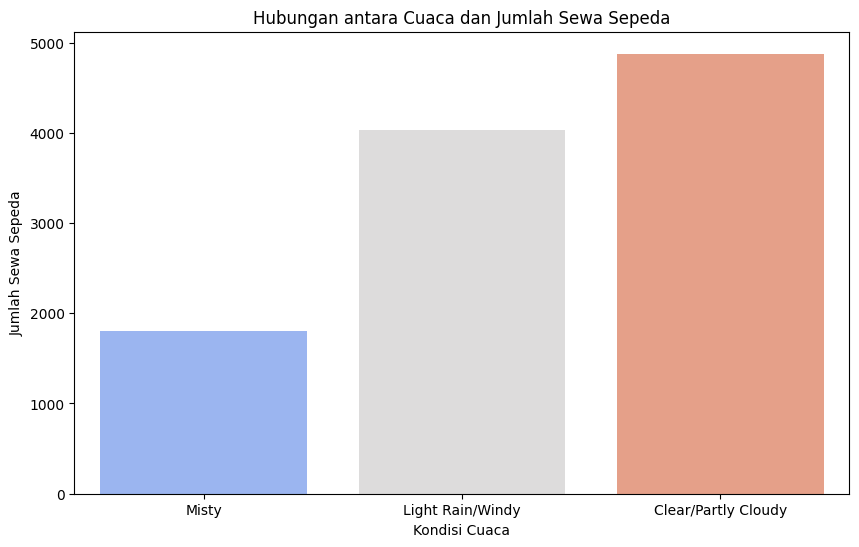

In [98]:
# Menghitung rata-rata 'cnt' untuk setiap kategori 'weathersit'
avg_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index().sort_values("cnt")

# Membuat barplot untuk menampilkan jumlah rata-rata 'cnt' untuk setiap kategori 'weathersit'
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=avg_weather, hue='weathersit', palette='coolwarm', legend=False)

# Mengatur judul, label sumbu x dan y
plt.title('Hubungan antara Cuaca dan Jumlah Sewa Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')

# Menampilkan plot
plt.show()

##### Dari grafik di atas dapat diambil kesimpulan bahwa cuaca juga berpengaruh terhadap tingkat penyewaan sepeda yang mana tingkat penyewaan sepeda tertinggi pada saat cuacanya Cerah/Sedikit berawan dan terendah pada saat cuacanya berkabut.

### **Pertanyaan 3: Pada jam berapakah penyewaan sepeda tertinggi**

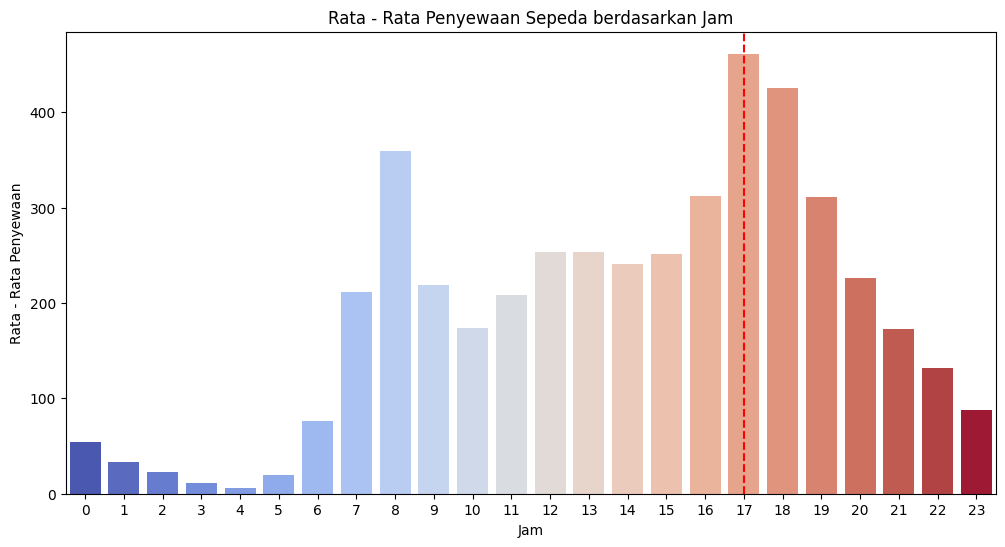

Rata-rata jam ketika orang menyewa sepeda paling banyak adalah pada jam 17


In [99]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam
avg_hour = hr_df.groupby('hr')['cnt'].mean().reset_index()

# Mencari jam dengan rata-rata penyewaan sepeda tertinggi
max_avg_hour = avg_hour['hr'].iloc[avg_hour['cnt'].idxmax()]

# Membuat barplot untuk menampilkan rata-rata penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=avg_hour, hue='hr', palette='coolwarm', legend=False)

# Menandai jam dengan rata-rata penyewaan sepeda tertinggi
plt.axvline(x=max_avg_hour, color='red', linestyle='--')

# Mengatur judul, label sumbu x dan y
plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Penyewaan')

# Menampilkan plot
plt.show()

# Menampilkan jam dengan rata-rata penyewaan sepeda tertinggi
print(f"Rata-rata jam ketika orang menyewa sepeda paling banyak adalah pada jam {max_avg_hour}")

##### Dari grafik di atas diketahui bahwa penyewaan sepeda paling banyak terjadi pada jam 17:00.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan gambar visualisasi di atas di dapatkanlah hasil bahwa penyewaan paling banyak terjadi pada musim gugur(Fall)
- Conclution pertanyaan 2: Dari visualisasi di atas bisa disimpulkan bahwa cuaca memiliki tingkat pengaruh yang lumayan signifikan terhadap jumlah penyewaan sepeda yang mana penyewaan sepeda terjadi paling banyak pada saat cuaca cerah/sedikit berawan dan paling sedikit pada saat cuaca berkabut.
- Conclution pertanyaan 3: Berdasarkan visualisasi di atas dapat dilihat bahwa penyewaan sepeda tebanyak yaitu pada jam 17:00 atau saat sore hari.